*IMPORTING NECESSARY LIBRARIES*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

*CONVERTING DATA FROM CSV INTO DATAFRAME*

In [39]:
Train_data=pd.read_csv('C:\VS PROJECTS\GUVI FINAL PROJ\p2_train.csv',names=["f1", "f2","f3","Target"])
Test_data=pd.read_csv('C:\VS PROJECTS\GUVI FINAL PROJ\p2_test.csv',names=["f1", "f2","f3","Target"])

#checking shapes of dataframes
print(Train_data.shape)
print(Test_data.shape)
Train_data.head

(10000, 4)
(5000, 4)


<bound method NDFrame.head of             f1        f2        f3         Target
0     6.501996 -8.536983  3.422935  119980.220246
1     1.328383  8.943578 -8.145307   29890.224974
2     0.161478 -7.928351  1.628924    3245.579405
3    -8.989890  0.621330 -2.322925  411824.663771
4     5.185118  7.902611  7.559619  176097.137744
...        ...       ...       ...            ...
9995 -0.209969  0.516290  1.757739       4.730791
9996 -1.908943  8.884813 -8.949701   67718.037645
9997  5.155422  5.500823  7.804984  165778.153769
9998  7.410197 -3.096079  4.394444  212850.414030
9999  8.658392  2.129026 -2.237578  396440.751196

[10000 rows x 4 columns]>

*CHECKING FOR SKEWNESS IN DATA*

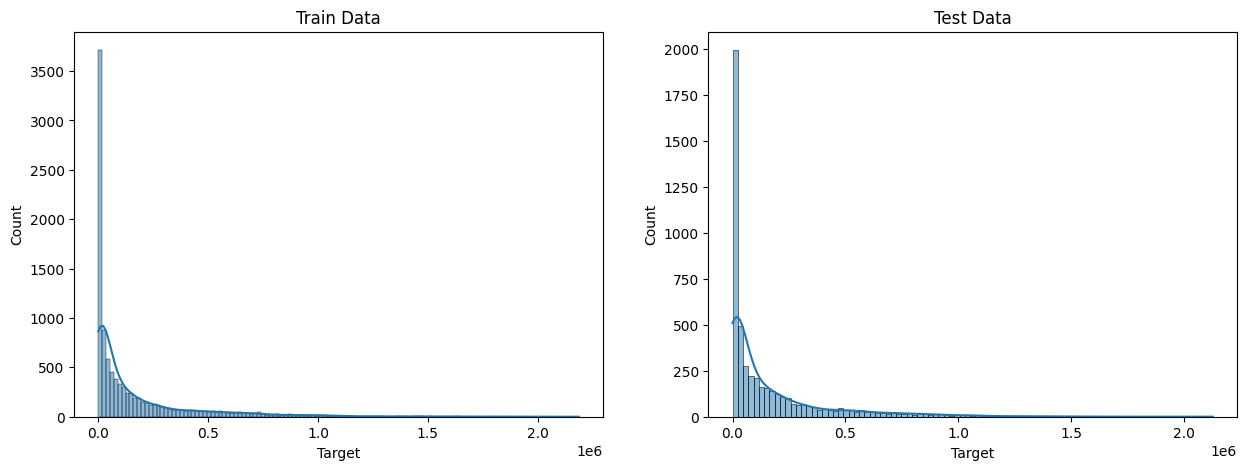

============== TRAIN DATA SKEWNESS ============
Skew Value for Target_Train data:  2.5043282462956036


============== TEST DATA SKEWNESS ============
Skew Value for Target_Test data:  2.532295107327466


In [40]:
#for Train data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Train Data")
sns.histplot(Train_data['Target'],kde=True)
#for Test data
plt.subplot(1,2,2)
plt.title("Test Data")
sns.histplot(Test_data['Target'],kde=True)
plt.show()
print("============== TRAIN DATA SKEWNESS ============")
print('Skew Value for Target_Train data: ',Train_data['Target'].skew())
print("\n\n============== TEST DATA SKEWNESS ============")
print('Skew Value for Target_Test data: ',Test_data['Target'].skew())

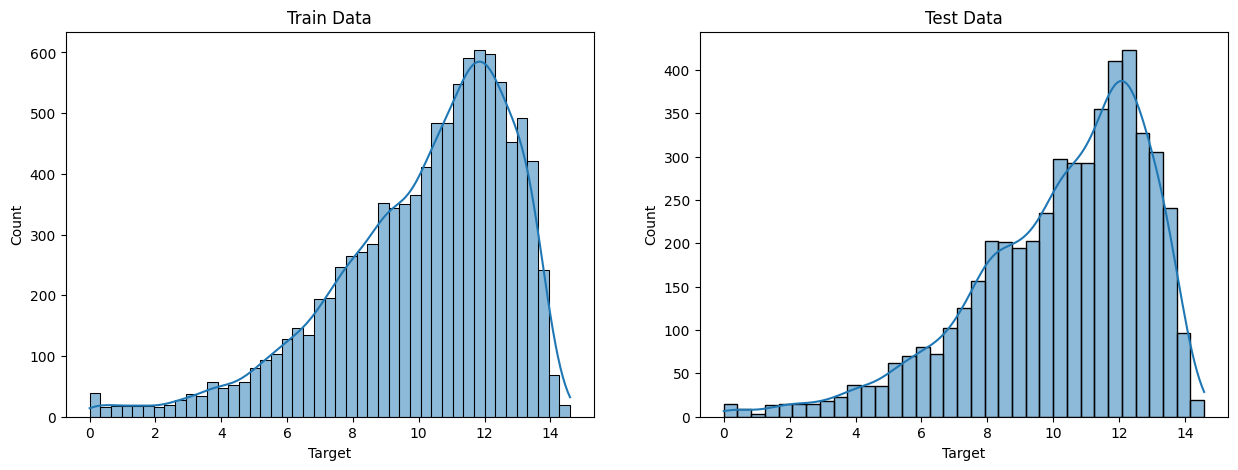

============== TRAIN DATA SKEWNESS ============
Skew Value for Target_Train data:  -1.039491294287391


============== TEST DATA SKEWNESS ============
Skew Value for Target_Test data:  -1.018080968679677


In [41]:
#Logarithmic Transformation to Resolve Skewness in Target Variable(Label)
Train_data['Target'] = np.log1p(Train_data['Target'])
Test_data['Target'] = np.log1p(Test_data['Target'])

#Plotting graph for Visualizing Target Distribution after Logarithmic Transformation
#for Train data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Train Data")
sns.histplot(Train_data['Target'],kde=True)
#for Test data
plt.subplot(1,2,2)
plt.title("Test Data")
sns.histplot(Test_data['Target'],kde=True)
plt.show()
print("============== TRAIN DATA SKEWNESS ============")
print('Skew Value for Target_Train data: ',Train_data['Target'].skew())
print("\n\n============== TEST DATA SKEWNESS ============")
print('Skew Value for Target_Test data: ',Test_data['Target'].skew())

*SPLITTING DATA FOR TRAIN & TEST*

In [42]:
#Training datasets
X_train = Train_data.iloc[:,:-1]
y_train = Train_data.iloc[:,-1]
#Testing datasets
X_test = Test_data.iloc[:,:-1]
y_test = Test_data.iloc[:,-1]


*FEATURE SCALING*

In [43]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

*FUNCTION TO TRAIN THE MODEL*

In [44]:
def liner_model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    MAE=mean_absolute_error(y_test,y_pred)
    RMSE=root_mean_squared_error(y_test,y_pred)
    return MAE,RMSE

*EVALUATION METRICS*

In [45]:
MAE_list=[]
RMSE_list=[]
#to test the data using model
model_list=[SVR(kernel='rbf',C=1),LinearRegression(),RandomForestRegressor(random_state=42),MLPRegressor(learning_rate_init=0.1, hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)]
for models in model_list:
    mae,rmse=liner_model(models)
    MAE_list.append(mae)
    RMSE_list.append(rmse) 
    print(f'\n======================== Using {models.__class__.__name__} Model =================================')
    print('ROOT MEAN SQUARED ERROR: ',rmse)
    print("MEAN ABSOLUTE ERROR :",mae)



======================== Using SVR Model =================================
ROOT MEAN SQUARED ERROR:  1.1785567643286246
MEAN ABSOLUTE ERROR : 0.5437972783921992

======================== Using LinearRegression Model =================================
ROOT MEAN SQUARED ERROR:  2.6332906401450837
MEAN ABSOLUTE ERROR : 2.0997508773072435

======================== Using RandomForestRegressor Model =================================
ROOT MEAN SQUARED ERROR:  0.6056481425238478
MEAN ABSOLUTE ERROR : 0.2523651377619421

======================== Using MLPRegressor Model =================================
ROOT MEAN SQUARED ERROR:  0.6307362212768663
MEAN ABSOLUTE ERROR : 0.4036485973895009


*PLOTTING THE GRAPH*

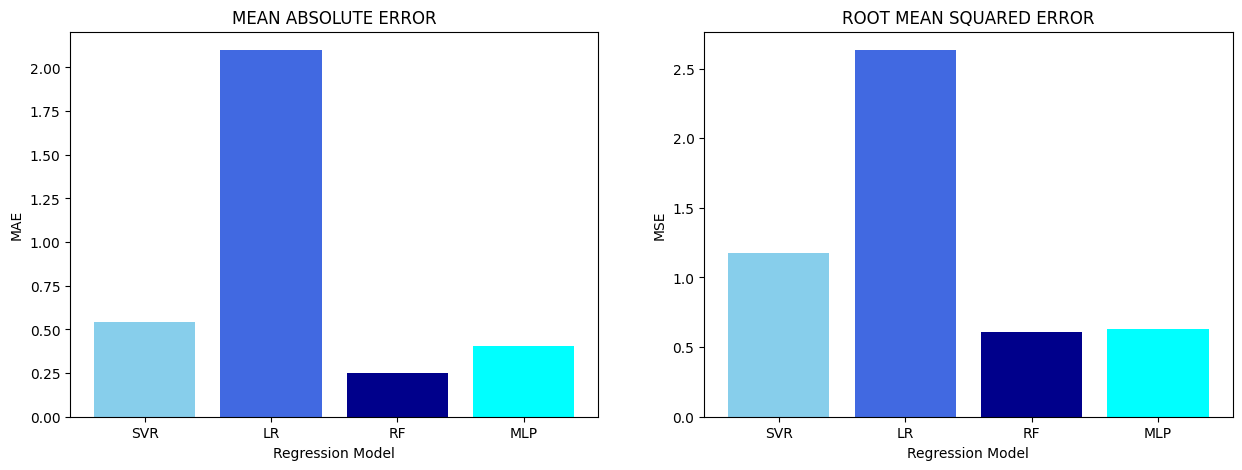

In [47]:
#plot mae graph
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(['SVR','LR','RF','MLP'],MAE_list,color=['skyblue','royalblue','darkblue','aqua'])
plt.title("MEAN ABSOLUTE ERROR")
plt.xlabel("Regression Model")
plt.ylabel("MAE")
#plot mse graph
plt.subplot(1,2,2)
plt.bar(['SVR','LR','RF','MLP'],RMSE_list,color=['skyblue','royalblue','darkblue','aqua'])
plt.title("ROOT MEAN SQUARED ERROR")
plt.xlabel("Regression Model")
plt.ylabel("MSE")
plt.show()